## MVA 2019-20  -  TP2

To download this notebook or its html/pdf version:

http://geometrica.saclay.inria.fr/team/Fred.Chazal/MVA2019.html

In [5]:
import numpy as np
import gudhi as gd
import random as rd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
plt.style.use('seaborn')

In [7]:
print(gd.__version__)

3.0.0


# Exercise 1: Stability of persistence for functions

Documentation for the latest version of Gudhi: 

http://gudhi.gforge.inria.fr/python/latest/

The goal of this exercise is to illustrate the persistence stability theorem for functions on a very simple example. The code below allows to define a simplicial complex (the so-called α-complex) triangulating a set of random points in the unit square in the plane. Although we are not using it for this course, note that gudhi also provides the grid-like CubicalComplex, which may be a more natural choice to represent a function on a square.

In [81]:
n_pts=1000
# Build a random set of points in the unit square
X = np.random.rand(n_pts, 2)
# Compute the alpha-complex filtration
alpha_complex = gd.AlphaComplex(points=X)
st = alpha_complex.create_simplex_tree()

st.persistence()
print("Initial Betti nos.", st.betti_numbers())

Initial Betti nos. [1, 0]


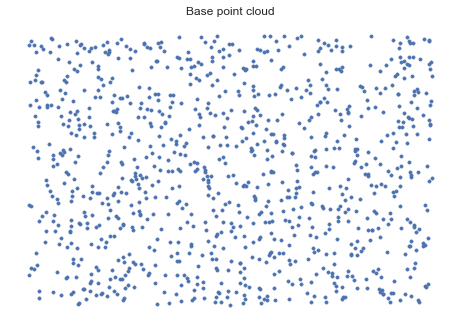

In [82]:
# Plot the point cloud
plt.scatter(*X.T, s=12)
plt.title("Base point cloud")
plt.axis('off');

Let $p_0=(0.25, 0.25)$ and $p_1=(0.75, 0.75)$ be 2 points in the plane $\mathbb{R}^2$ and $\sigma=0.05$.
1. Build on such a complex the sublevelset filtration of the function $$f(p)=\exp(-\frac{\|p-p_0\|^2}{\sigma})+3\exp(-\frac{\|p-p_1\|^2}{\sigma})$$ and compute its persistence diagrams in dimensions 0 and 1.
2. Compute the persistence diagrams of random perturbations of f and compute the Bottleneck distance between these persistence diagrams and the perturbated ones. Verify that the persistence stability theorem for functions is satisfied.

In [83]:
p0 = np.array([0.25, 0.25])
p1 = np.array([0.75, 0.75])
sigma = 0.05

def filt_function(p: np.ndarray, p0=p0, p1=p1):
    dist0 = np.sum((p-p0)**2)
    dist1 = np.sum((p-p1)**2)
    res = np.exp(-dist0/sigma) + 3 * np.exp(-dist1/sigma)
    return res

In [84]:
def filt_splx(splx, cloud, f=filt_function):
    # compute filt_function on the vertices of the simplex
    values = []
    for vtx in splx:
        p = cloud[vtx]
        values.append(f(p))
    return max(values)

In [85]:
for splx,_ in st.get_filtration():
    st.assign_filtration(splx, filt_splx(splx, X))

st.initialize_filtration()
L = st.get_filtration()

diag = st.persistence(persistence_dim_max=True)

print("Betti numbers:", st.betti_numbers())

Betti numbers: [1, 0, 0]


Deprecated parameter. It has been replaced by max_intervals


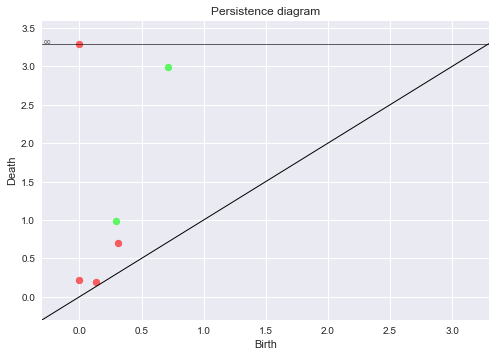

In [86]:
gd.plot_persistence_diagram(diag)
fig = plt.gcf()

### Question 2

In [211]:
eps = 1e-25
g = lambda p: filt_function(p) + eps * np.random.rand()

In [212]:
st = alpha_complex.create_simplex_tree()

In [213]:
for splx,_ in st.get_filtration():
    st.assign_filtration(splx, filt_splx(splx, X, g))

    
    
st.initialize_filtration()
L = st.get_filtration()

diag_eps = st.persistence(persistence_dim_max=True)

print("Betti numbers:", st.betti_numbers())

Betti numbers: [1, 0, 0]


Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals


Text(0.5, 1.0, 'Persistence diagram ($\\epsilon=1.00e-25$)')

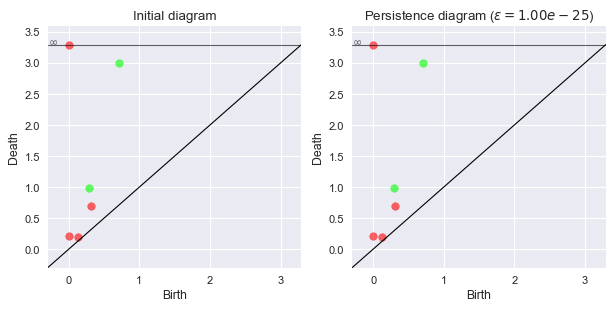

In [222]:
fig = plt.figure(figsize=(9, 4), dpi=80)

plt.subplot(121)
gd.plot_persistence_diagram(diag)
plt.title("Initial diagram")
plt.subplot(122)
gd.plot_persistence_diagram(diag_eps)
plt.title("Persistence diagram ($\\epsilon=%.2e$)" % eps)

In [215]:
def extract_pd_dim(diag, dim):
    data = filter(lambda x: x[0] == dim, diag)
    data = map(lambda x: x[1], data)
    return list(data)

In [218]:
dists = []
for dim in range(st.dimension()):
    print("Dimension %d" % dim)
    dist = gd.bottleneck_distance(
        extract_pd_dim(diag, dim),
        extract_pd_dim(diag_eps, dim))
    print("\tDistance:", dist)
    dists.append((dim, dist))

Dimension 0
	Distance: 2.145830024532922e-308
Dimension 1
	Distance: 1.9131994644261207e-308


In [219]:
dists

[(0, 2.145830024532922e-308), (1, 1.9131994644261207e-308)]

# Exercise 2: Stability of Vietoris-Rips and alpha-complex filtrations

1. Illustrate the stability theorem for persistence diagrams of Vietoris-Rips and α-complex filtrations (take care that AlphaComplex uses the square of distances as filtration values).
2. What happens to Vietoris-Rips and α-complex filtrations when the size of the point cloud increases? When the ambient dimension increases?

Define the point cloud:

In [259]:
n_pts = 2000
ambient_dim = 3

In [261]:
X = np.random.rand(n_pts, ambient_dim)

In [260]:
from mpl_toolkits import mplot3d

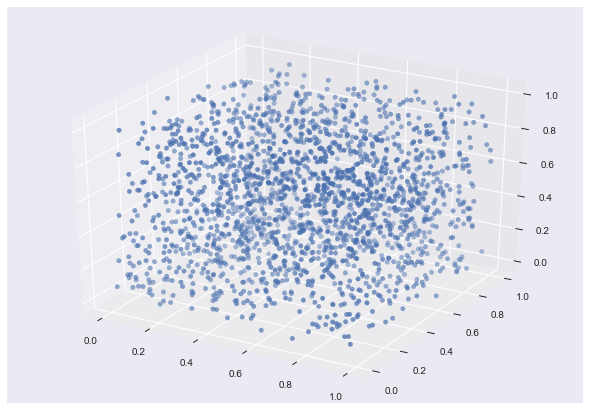

In [263]:
fig = plt.figure()
ax3d = mplot3d.Axes3D(fig)
ax3d.scatter(*X.T)

In [258]:
# Vietoris-Rips Complex
COMPLEX = gd.RipsComplex(X)
st = COMPLEX.create_simplex_tree()

In [242]:
L = st.get_filtration()

In [243]:
diag_ = st.persistence(persistence_dim_max=True)

In [244]:
## Perturbation
eps = 1e-25

for splx, val in L:
    st.assign_filtration(splx, val + eps * np.random.rand())

st.initialize_filtration()
L_eps = st.get_filtration()

In [245]:
diag_eps = st.persistence(persistence_dim_max=True)

Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals


Text(0.5, 1.0, 'Persistence diagram ($\\epsilon=1.00e-25$)')

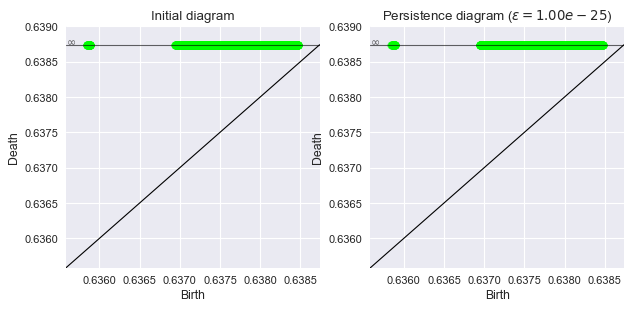

In [246]:
fig = plt.figure(figsize=(9, 4), dpi=80)

plt.subplot(121)
gd.plot_persistence_diagram(diag_)
plt.title("Initial diagram")
plt.subplot(122)
gd.plot_persistence_diagram(diag_eps)
plt.title("Persistence diagram ($\\epsilon=%.2e$)" % eps)

Now for the Alpha Complex:

In [249]:
# Vietoris-Rips Complex
COMPLEX = gd.AlphaComplex(X)
st = COMPLEX.create_simplex_tree()

In [250]:
L = st.get_filtration()

In [251]:
diag_ = st.persistence(persistence_dim_max=True)

In [252]:
## Perturbation
eps = 1e-25

for splx, val in L:
    st.assign_filtration(splx, val + eps * np.random.rand())

st.initialize_filtration()
L_eps = st.get_filtration()

In [253]:
diag_eps = st.persistence(persistence_dim_max=True)

Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals


Text(0.5, 1.0, 'Persistence diagram ($\\epsilon=1.00e-25$)')

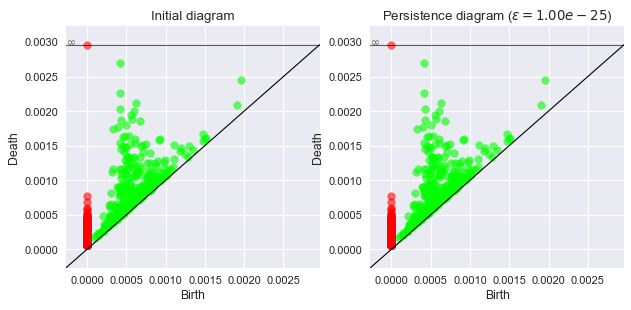

In [254]:
fig = plt.figure(figsize=(9, 4), dpi=80)

plt.subplot(121)
gd.plot_persistence_diagram(diag_)
plt.title("Initial diagram")
plt.subplot(122)
gd.plot_persistence_diagram(diag_eps)
plt.title("Persistence diagram ($\\epsilon=%.2e$)" % eps)

# Linearization of persistence diagrams

# Exercise 3: Betti curves

We consider the map that associates to each persistence diagram $D$ a real valued function 
$\beta_D : \mathbb{R} \to \mathbb{R}$ in the following way:

$$\beta_D(x) = \# \{ p=(b,d) \in D : b \leq x \leq d \}.$$ 

1. Given a filtration $(K_r)_{r \in \mathbb{R}}$ of a $k$-dimensional simplicial complex $K$ and its persistence diagrams $D_0, D_1, \cdots, D_k$ in dimensions $0, 1, \cdots, k$ respectively, what does $\beta_{D_i}(x)$ represent? 
2. Write a function taking a persistence diagram (for a given homology dimension) as input that outputs its Betti curve (on a discretized grid). 
3. Compute the Betti curves of the random persistence diagrams obtained in the previous exercises. What can you say about the stability (as a function) of the Betti curves? Do they satisfy the same stability properties as the persistence diagrams? 

# Exercise 4: Persistence landscapes

1. Implement a function that compute the persistence landscapes of a persistence diagram (on a discretized grid): 

**See the slides by F. Chazal.**

In [5]:
def landscapes_approx(diag,p_dim,x_min,x_max,nb_nodes,nb_ld):
    """Compute a dicretization of the first nb_ld landscape of a 
    p_dim-dimensional persistence diagram on a regular grid on the 
    interval [x_min,x_max]. The output is a nb_ld x nb_nodes numpy
    array
    + diag: a persistence diagram (in the Gudhi format)
    + p_dim: the dimension in homology to consider
    + x_min, x_max: the bounds of the interval on which the landscape is computed
    + nb_nodes: number of regularly spaced nodes on the interval (x_min,x_max) where the landscapes are evaluated
    + nb_ld: number of condidered landscapes
    """
    landscape = np.zeros((nb_ld,nb_nodes))
    ###
    ###  To do! 
    ###
    return landscapes

2 .Same question as Question 3 in Exercise 3. 